# Project 2 - Linear Regression and Gradient Descent

## 📖 Section 1: What is Linear Regression?

### ✅ Objective:

- Connect the idea that a **neural network without hidden layers and without activations** is simply a **linear model**.

- Provide an **intuitive explanation** of linear regression with **real-world examples**.


### 🧠 Markdown Cell 1.1: Understanding Linear Regression

### 1.1 What is Linear Regression?

🔵 **Linear Regression** is one of the simplest forms of supervised learning.

In its basic form, it models the relationship between **input(s)** and **output** by assuming a **straight-line relationship**:

$$
\hat{y} = XW + b
$$

Where:
- $X$ = Input features (tensor)
- $W$ = Weights (parameters to learn)
- $b$ = Bias term
- $\hat{y} $ = Predicted output

---

🔵 **Connection to Neural Networks:**

- A **neural network with no hidden layers and no activation functions** behaves exactly like a **linear regression model**.
- It simply computes a **weighted sum** of inputs plus a bias.

> **Key Insight:**  
> Linear models are the building blocks of deep learning. If we stack multiple layers and apply activation functions, we move from simple lines to very complex, nonlinear functions!

---

### 🏗 Real-world Examples:
- Predicting **house prices** based on size.
- Estimating **salary** based on years of experience.
- Predicting **concrete strength** based on material composition (our dataset!).

---


### 🧠 Markdown Cell 2.1: Mathematical Formulation

# 2.1 Mathematical Formulation of Linear Model

The prediction formula for a linear model is:

$$
\hat{y} = XW + b
$$

Where:

| Term       | Meaning                   | Shape                 |
|:-----------|:--------------------------|:----------------------|
| $X$        | Input features matrix     | $(n, d)$              |
| $W$        | Weights vector            | $(d, 1)$              |
| $b$        | Bias (scalar or $(n, 1)$) | Scalar or broadcasted |
| $\hat{y}$  | Predicted outputs         | $(n, 1)$              |

---

✅ In words:  
- **Multiply** the input features by the weight vector.  
- **Add** the bias.  
- You get the **predicted output**!

---

### 🧠 Example:

Suppose we have:
- 3 data points (rows)
- 2 features each (columns)

$$
X = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\quad
W = \begin{bmatrix}
0.5 \\
1.5
\end{bmatrix}
\quad
b = 2
$$

Then:

$$
\hat{y} = XW + b =
\begin{bmatrix}
1 \times 0.5 + 2 \times 1.5 + 2 \\
3 \times 0.5 + 4 \times 1.5 + 2 \\
5 \times 0.5 + 6 \times 1.5 + 2
\end{bmatrix}
=
\begin{bmatrix}
6 \\
11 \\
16
\end{bmatrix}
$$


## 📖 Section 3: Predict Function (Tiny Dataset)

### ✅ Objective:

- Move from **theory to a small working example**  
- Manually define a `predict(X)` function  
- Show the **very first forward computation** step


#### 🧠 Markdown Cell 3.1: Predict Function Idea

#### 3.1 Predict Function

Now, let's move from formulas to actual code!

We will define a **predict** function that calculates:

$$
\hat{y} = XW + b
$$

where $ X $ is our input tensor, $ W $ are the weights, and $ b $ is the bias.

---

✅ Remember:  
- $ W $ and $ b $ are **parameters** we want to learn later during training.
- For now, we'll just manually set them to random values.

---


#### 🖥️ Code Cell 3.1: Predict Function on Tiny Dataset

In [33]:
import torch

# Tiny toy dataset
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
Y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Randomly initialized weights and bias
W = torch.tensor([[0.5]], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

# Predict function
def predict(X):
    return torch.matmul(X, W) + b

# Test prediction
y_pred = predict(X)
print("Predictions:")
print(y_pred)


Predictions:
tensor([[0.5000],
        [1.0000],
        [1.5000],
        [2.0000]], grad_fn=<AddBackward0>)


#### ✍️ Practice Cell 3.1 (Optional small exercise)

#### 🛠️ Practice Exercise 3.1

✅ Your Task:

- Modify the weight **W** and bias **b** manually.
- Predict again.
- Observe how the output changes.

🔔 *Hint:* Try changing W to 2.0 and b to 1.0 and see if predictions improve!

## 📖 Section 4: MSE Loss (Mean Squared Error)

### ✅ Objective:

- Introduce **loss functions** in regression problems  
- Focus mainly on **Mean Squared Error (MSE)**  
- Briefly mention alternatives like **Mean Absolute Error (MAE)** and **Huber Loss**  
- **Manually implement** a simple MSE function in code


#### 🧠 Markdown Cell 4.1: Loss Functions for Regression

### 4.1 Loss Functions for Regression

In supervised learning, we need a way to measure **how good or bad** our model's predictions are compared to the actual targets.  
This measurement is done using a **loss function**.

---

### 🔵 Mean Squared Error (MSE)

The **Mean Squared Error (MSE)** is the most common loss function for **regression** tasks.

Mathematically, it is defined as:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $y_i$ = true target value  
- $\hat{y}_i$ = model prediction  
- $n$ = number of examples

✅ **In simple terms:**
- Take the **difference** between prediction and true value  
- **Square** it (to make all differences positive)  
- **Average** the result across all data points

---

### 🔵 Other Loss Functions (just for awareness)

- **Mean Absolute Error (MAE):**  
  Takes the absolute difference — less sensitive to large errors

- **Huber Loss:**  
  A combination of MSE and MAE — more robust to outliers


#### 🖥️ Code Cell 4.1: Implement MSE Loss Function

In [34]:
# Mean Squared Error (MSE) function
def mse_loss(predictions, targets):
    return torch.mean((predictions - targets)**2)

# Test with tiny dataset
# Ground truth
Y_true = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Random predictions
Y_pred = torch.tensor([[2.5], [3.5], [5.5], [8.5]])

# Compute loss
loss = mse_loss(Y_pred, Y_true)
print("MSE Loss:", loss.item())


MSE Loss: 0.25


#### ✍️ Practice Cell 4.1 (Small Exercise)

#### 🛠️ Practice Exercise 4.1

✅ Your Task:

- Modify the `Y_pred` values manually to make them **closer** to `Y_true`.
- Recompute the MSE loss.
- **Observe**: Does the loss decrease?

🔔 *Hint:* 
- Try setting `Y_pred = [[2.1], [4.0], [6.1], [7.9]]` 
- Calculate and compare!

---


## 📖 Section 5: Training/Test Split

### ✅ Objective:

- Introduce **why we need train/test splits**  
- Explain the concept of **generalization vs. overfitting**  
- Actually split the **Concrete dataset** into **80% training** and **20% testing**


#### 🧠 Markdown Cell 5.1: Why Split into Training and Test Sets?

### 5.1 Why Split into Training and Test Sets?

✅ When we train a machine learning model, we want it to perform **well not only on the data it saw during training, but also on new, unseen data**.

This is called **generalization**.

---

🔵 **Training Set:**
- Used to learn the model's weights (parameters).
- Model sees this data during optimization.

🔵 **Test Set:**
- Used to evaluate how well the model generalizes.
- Model **should NOT** see this data during training!

---

✅ Without a test set, we might create models that **memorize** (overfit) the training data without truly learning patterns that generalize.

---
**Example:**  
Imagine learning a set of 10 quiz questions by heart.  
If the final exam gives you **the same questions**, you'll ace it (training success).  
But if you get **new questions**, your true understanding is tested (generalization)!

---

#### 🖥️ Code Cell 5.1: Split Concrete Dataset

In [35]:
# Assume 'inputs_tensor' and 'targets_tensor' are already created (from Notebook 1)

# Set random seed for reproducibility
torch.manual_seed(42)

# Total number of samples
n_samples = inputs_tensor.shape[0]

# Shuffle indices
indices = torch.randperm(n_samples)

# 80-20 split
split_idx = int(n_samples * 0.8)

train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

# Create training and testing sets
X_train = inputs_tensor[train_indices]
y_train = targets_tensor[train_indices]

X_test = inputs_tensor[test_indices]
y_test = targets_tensor[test_indices]

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 824
Test set size: 206


#### ✍️ Practice Cell 5.1 (Small Exercise)

#### 🛠️ Practice Exercise 5.1

✅ Your Task:

- Print:
  - First 5 examples of `X_train` and `y_train`.
  - First 5 examples of `X_test` and `y_test`.
- Confirm that no data leakage happened (training and testing sets are separate).

🔔 *Hint:* 
- Use `print(X_train[:5])`, `print(y_train[:5])`, etc.

---


## 📚 Section 6: Manual Parameter Initialization

### 🎯 Objective

- Introduce the concept of **parameters**: weights ($W$) and bias ($b$)  
- Manually **initialize parameters** as PyTorch tensors  
- Set `requires_grad=True` to enable **gradient tracking**  
- 🛠️ **Practice:** Follow the instructions below and write your own code

#### 🧠 Markdown Cell 6.1: Why Initialize Parameters?

### 6.1 Manual Initialization of Model Parameters

✅ To perform linear regression, our model needs **two sets of parameters**:
- **Weights (W)** — these determine how important each input feature is.
- **Bias (b)** — this shifts the output up or down.

---

🔵 In PyTorch:
- We initialize weights and bias as **torch tensors**.
- We must set **`requires_grad=True`** so that PyTorch can compute **gradients** automatically later during training.

---

### 📏 Parameter Shapes:

Suppose we are using **only 1 feature** from the Concrete dataset (for simplicity):

| Parameter | Shape | Example |
|:---|:---|:---|
| Weight (W) | (1, 1) | One weight per input feature |
| Bias (b) | (1,) | Single bias |

✅ Later, when we move to multiple features, the shape of `W` will be `(num_features, 1)`.

---

> **Key point:**  
> - Random initial weights are fine.
> - Training will adjust them based on data!

---


#### ✍️ Practice Task 6.1 (instead of full code)

#### 🛠️ Practice Exercise 6.1

✅ Your Task:

- Manually initialize the model parameters:
  - Weight tensor `W`
  - Bias tensor `b`
- Both should have:
  - Random initial values (small numbers)
  - `requires_grad=True` so PyTorch tracks gradients

🔔 *Hint:* 
- Use `torch.randn()` for random numbers.
- Example: `W = torch.randn((1, 1), requires_grad=True)`

🔥 Quick Tip:

✅ You can think of `W` and `b` as **variables** whose values we want to "tune" during training.

✅ PyTorch will automatically compute **how much to change W and b** to make predictions better during each training step!

---

In [36]:
# 🖥️ Expected Solution (only for Instructor — not shown to students)

import torch

# Random weight and bias with gradient tracking
W = torch.randn((1, 1), requires_grad=True)
b = torch.randn((1,), requires_grad=True)

print("Weight:", W)
print("Bias:", b)


Weight: tensor([[-0.6641]], requires_grad=True)
Bias: tensor([-0.3682], requires_grad=True)


## 📚 Section 7: Gradient Descent Concept

### 🎯 Objective

- Explain what **gradient descent** is in **intuitive terms**

---

### 🧠 Key Concepts to Cover:

- **Loss Minimization**  
  Our goal is to reduce the loss — make predictions as close as possible to the true values.

- **Gradients**  
  Gradients tell us **which direction** to move the parameters (weights and bias) and **how much**.  
  - The **sign** tells the direction.  
  - The **magnitude** tells how steep the slope is.

- **Learning Rate**  
  The learning rate is the **step size** we use when updating parameters using the gradients.  
  - Too small: training is slow  
  - Too large: may overshoot or diverge

---

📌 *Gradient descent is like finding the lowest point in a valley by taking small steps downhill, guided by the slope.*


#### 🧠 Markdown Cell 7.1: What is Gradient Descent?

### 7.1 Gradient Descent Concept

✅ Once we have a **model** (like our linear model) and a **loss function** (like MSE),  
we need a way to **optimize** the model parameters ($W$ and $b$) to **minimize the loss**.

This is where **gradient descent** comes in!

---

### 🔵 What is Gradient Descent?

- It is an **optimization algorithm**
- It updates the model parameters in the **direction that reduces the loss the fastest**
- It uses the **gradient (slope)** of the loss function to decide how to change $W$ and $b$

---

### 📈 How Gradient Descent Works

For each parameter (e.g., a weight $w$):

$$
w \leftarrow w - \alpha \times \frac{\partial L}{\partial w}
$$

Where:
- $\alpha$ = Learning rate (a small positive number)  
- $\frac{\partial L}{\partial w}$ = Derivative (gradient) of the loss with respect to the weight

✅ This means:
- If the loss increases when you increase $w$, you should **decrease** $w$
- If the loss decreases when you increase $w$, you should **increase** $w$

---

### 🔵 Learning Rate

- Controls **how big** each update step is  
- If too large ➔ may **overshoot** and miss the minimum  
- If too small ➔ may result in **very slow** convergence

---

### 🧠 Visual Intuition

Imagine you are **walking downhill**:
- The gradient tells you the **steepest direction** to walk
- The learning rate controls **how big your steps are**

✅ Our goal is to **walk downhill** until we find the valley — the **minimum loss**!


## 📚 Section 8: Training Loop (Manual Gradient Descent)

### 🎯 Objective: Manual Training Loop

Now it's time to put everything together and **manually implement a training loop**.

---

### 🛠️ Your Task:

- Use your **initialized parameters**: `W` and `b`  
- Compute predictions using your `predict(X)` function  
- Calculate the **loss** using Mean Squared Error (MSE)  
- Perform **backpropagation** with `.backward()`  
- Manually **update the parameters** using gradient descent:
  
  $$ 
  W \leftarrow W - \alpha \cdot W.\text{grad} 
  \quad \text{and} \quad
  b \leftarrow b - \alpha \cdot b.\text{grad}
  $$

- Don’t forget to **zero the gradients** after each update using:
  ```python
  W.grad.zero_()
  b.grad.zero_()


#### 🧠 Markdown Cell 8.1: The Structure of a Training Loop

# 8.1 Building the Training Loop

✅ In machine learning, a **training loop** is the repetitive process of:
1. **Making predictions** using the current parameters.
2. **Computing the loss** (difference between predictions and true targets).
3. **Calculating gradients** (how loss changes w.r.t W and b).
4. **Updating the parameters** using gradient descent.
5. **Repeating** the process for many epochs (iterations).

---

🔵 **Typical Training Loop Steps:**

For each epoch:
- `y_pred = predict(X_train)`
- `loss = mse_loss(y_pred, y_train)`
- `loss.backward()`  ➔ compute gradients
- Update `W` and `b`:
  - `W = W - learning_rate * W.grad`
  - `b = b - learning_rate * b.grad`
- `zero out gradients` after update (important!)

---

✅ In PyTorch, we update parameters inside a `torch.no_grad()` block to avoid tracking the updates in the computation graph.

---


#### ✍️ Practice Task 8.1 (Training Loop Practice) 

#### 🛠️ Practice Exercise 8.1

✅ Your Task:

Write a training loop to **train your linear regression model** on the Concrete dataset.

Follow these steps:

---

1. Choose a **learning rate** (e.g., `0.01`).

2. For a number of **epochs** (e.g., 100):

    a. Make predictions using your `predict(X_train)` function.  
    b. Compute the MSE loss using your `mse_loss()` function.  
    c. Call `.backward()` on the loss to compute gradients.  
    d. Update the weights `W` and bias `b`:
       - Use `torch.no_grad()` block.
       - Apply the gradient descent rule:
         ```
         W -= learning_rate * W.grad
         b -= learning_rate * b.grad
         ```
    e. After updating, **zero out the gradients** using:
       ```
       W.grad.zero_()
       b.grad.zero_()
       ```

---

🔔 *Hints:*
- Use a `for epoch in range(epochs):` loop.
- You can print the loss every 10 epochs to monitor progress.

✅ At the end, your W and b should have changed to better values!

---


#### 🖥️ Expected Solution (for you to have, not shown to students)

In [ ]:
# Assume W and b are already initialized, inputs split into X_train, y_train

learning_rate = 0.01
epochs = 100

for epoch in range(epochs):
    # Forward pass
    y_pred = predict(X_train)
    loss = mse_loss(y_pred, y_train)
    
    # Backward pass
    loss.backward()
    
    # Update parameters
    with torch.no_grad():
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad
    
    # Zero gradients
    W.grad.zero_()
    b.grad.zero_()
    
    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}: Loss = {loss.item():.4f}')


## 📚 Section 9: Plotting Loss over Epochs

### 🎯 Objective: Visualize Loss Over Epochs

- **Visualize** how the loss changes over training epochs  
- Help students **see convergence** of the model (i.e., loss decreasing over time)  
- Introduce basic **matplotlib plotting** to monitor training progress

---

### 🛠️ Your Task:

1. Track the loss at each epoch in a list (e.g., `losses = []`)  
2. After training, use `matplotlib.pyplot` to plot loss vs. epoch  
3. Label your axes: `Epoch` (x-axis) and `Loss` (y-axis)  
4. Add a title like `"Training Loss Over Time"`

---

📌 *This helps build intuition about when a model is learning and when it might be stuck!*


#### 🧠 Markdown Cell 9.1: Why Plot Training Loss?

### 9.1 Why Plot Training Loss?

✅ During training, it’s important to **track the loss over time**:

- If the loss **decreases smoothly**, your model is learning properly.
- If the loss **bounces around wildly** or **increases**, there might be problems:
  - Too large learning rate
  - Bugs in your code
  - Bad initialization

---

🔵 **Good training behavior:**
- Loss starts high and **decreases steadily** toward a small value.

🔵 **Bad training behavior:**
- Loss increases, oscillates wildly, or gets stuck high.

✅ Visualizing the loss helps us **debug** and **understand training dynamics**!

---


#### ✍️ Practice Task 9.1: Plot Loss (Students code)

### 🛠️ Practice Exercise 9.1

✅ Your Task:

- While training your model (Section 8), **store the loss value at every epoch**.
- After training, **plot the loss curve** using matplotlib.

---

🔔 *Hints:*
- Create an empty list before training: `losses = []`
- Inside the training loop, after computing loss, do: `losses.append(loss.item())`
- After training:
  ```python
  import matplotlib.pyplot as plt
  plt.plot(losses)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training Loss over Epochs')
  plt.show()


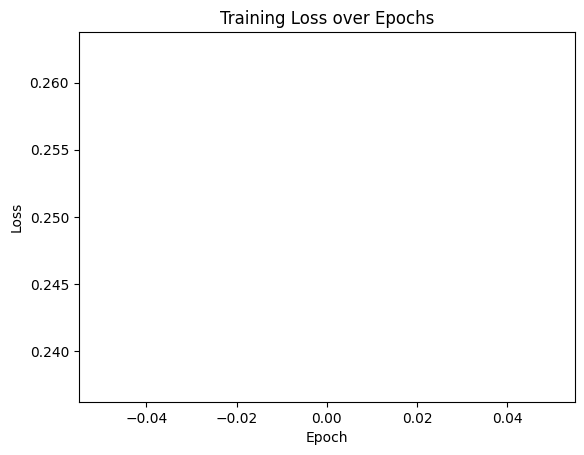

In [37]:

# ✅ Again, **Markdown gives enough instructions**, students must **write the code** properly.

## 🖥️ Expected internal solution (not shown to students)

import matplotlib.pyplot as plt

losses = []

# (inside training loop)
losses.append(loss.item())

# (after training)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()


## 📚 Section 10: Model Evaluation (Train/Test MSE)

### 🎯 Objective: Evaluate the Model After Training

Now that training is complete, it's time to **evaluate the model's performance**.

---

### 🛠️ Your Task:

- Compute **Mean Squared Error (MSE)** on:
  - ✅ **Training set**
  - ✅ **Testing set**

- Compare the two results:
  - Is the model performing similarly on both?
  - Or is it doing much better on training data?

---

### 🔍 Key Concept: Overfitting vs. Underfitting

- **Overfitting:** Model performs well on training data but poorly on unseen test data  
- **Underfitting:** Model performs poorly on both training and test data (hasn't learned enough)

📌 *Use this evaluation to reflect on your model's generalization ability.*


#### 🧠 Markdown Cell 10.1: Evaluating Model Performance

### 10.1 Evaluating Model Performance

✅ After training a model, we need to **measure how well it performs**:

- **Training MSE**: How well the model fits the data it was trained on.
- **Testing MSE**: How well the model generalizes to unseen data.

---

🔵 **Ideal Scenario:**
- Low training MSE
- Low testing MSE (slightly higher than training MSE)

🔵 **Possible Problems:**
- **Overfitting**: Very low training MSE but high testing MSE.
- **Underfitting**: High training MSE and high testing MSE.

✅ Evaluating both gives us a **full picture** of model performance!

---


### ✍️ Practice Task 10.1: Compute Train and Test MSE 

### 🛠️ Practice Exercise 10.1

✅ Your Task:

- After training your model:
  1. Use your final trained `W` and `b`.
  2. Predict on both:
     - Training set (`X_train`)
     - Testing set (`X_test`)
  3. Compute the MSE loss for:
     - Training predictions vs `y_train`
     - Testing predictions vs `y_test`
  4. Print both losses.

---

🔔 *Hints:*
- Reuse your `predict()` function and `mse_loss()` function.
- You **don't need gradients** now (just predictions + loss).

✅ You will get two numbers:
- Training Loss
- Testing Loss

---


### 🖥️ Expected internal solution (not shown to students)

In [38]:
# Predict on training set
train_preds = predict(X_train)
train_loss = mse_loss(train_preds, y_train)

# Predict on testing set
test_preds = predict(X_test)
test_loss = mse_loss(test_preds, y_test)

print(f'Training MSE: {train_loss.item():.4f}')
print(f'Testing MSE: {test_loss.item():.4f}')


RuntimeError: mat1 and mat2 shapes cannot be multiplied (824x8 and 1x1)

## 📚 Section 11: Reflection — Limits of Linear Models

### 🎯 Objective: Wrap-Up and Transition

- Reflect on what we’ve achieved using **linear regression**  
- Realize the **limitations** of simple linear models  
- Introduce the need for **activation functions** and **hidden layers** to capture complex patterns  
- Prepare to **transition naturally** to upcoming notebooks on neural networks

---

### 🔍 What We've Achieved:

- Built a working linear model from scratch
- Understood gradient descent and manual training loops
- Visualized training progress and evaluated model performance

---

### 🚧 Limitations of Linear Models:

- Can only model **linear relationships**
- Cannot capture **non-linear patterns** or **interactions**
- Often **underfit** complex real-world datasets

---

### 🔑 Why Activation Functions and Hidden Layers?

- **Activation functions** introduce non-linearity  
- **Hidden layers** allow the model to learn more abstract representations  
- Together, they form the foundation of **neural networks**

---

### 🧠 Quick Check (Mini MCQs)

**Q1.** Which of the following is a limitation of linear regression?  
(A) It requires a loss function  
(B) It only models linear relationships ✅  
(C) It doesn't use any math  
(D) It can't be implemented in PyTorch

---

**Q2.** Why do we need activation functions in a neural network?  
(A) To reduce the training time  
(B) To remove weights and biases  
(C) To introduce non-linearity ✅  
(D) To make the model linear

---

🎉 *Well done! You're now ready to explore neural networks and go beyond linear models.*


### 🧠 Markdown Cell 11.1: How Well Did the Linear Model Work?

## 11.1 Reflecting on Linear Models

✅ Congratulations! You have now:

- Built a linear model from scratch.
- Used gradient descent to minimize the MSE loss.
- Evaluated model performance on training and testing data.

---

🔵 **Some Important Observations:**

- A linear model can capture **linear relationships** between inputs and outputs.
- But if the relationship is **nonlinear** (curved, complex patterns), a linear model **cannot fit well**.

---

### 🔥 Key Limitations of Linear Models:

| Limitation | Description |
|:---|:---|
| Cannot model nonlinear patterns | Only straight lines or flat planes |
| Underfitting on complex data | Cannot capture intricate relationships |
| No internal "processing" | Single-layer transformations only |

---

✅ **This is why** in Deep Learning, we often:
- Add **hidden layers**.
- Use **activation functions** (like ReLU, Sigmoid).
- Stack **multiple layers** to build complex models.

✅ Hidden layers allow the network to **transform** and **learn nonlinear mappings** between input and output!

---


## ✍️ Practice Task 11.1: Quick MCQs (Knowledge Check)

## 🛠️ Practice Exercise 11.1 (MCQs)

✅ Choose the correct answers based on your learning so far:

---

**Q1. Why does a simple linear model fail on complex datasets?**

- [ ] It memorizes the training data.
- [x] It cannot capture nonlinear patterns.
- [ ] It uses too many layers.
- [ ] It overfits easily.

---

**Q2. What is the main purpose of adding activation functions in a neural network?**

- [x] To introduce nonlinearity
- [ ] To make training faster
- [ ] To remove bias
- [ ] To reduce the number of parameters

---

**Q3. After training a model, a very low training loss but very high test loss suggests:**

- [ ] Good generalization
- [x] Overfitting
- [ ] Underfitting
- [ ] Correct model complexity

---

✅ Write your selected answers clearly below each question.
✅ Reflect briefly (1–2 sentences) on **what you found easy or difficult** in building your first model!

---


# 🎯 Final Words for Notebook 2

✅ In this project, you have learned how to:

- Build a basic linear model.
- Train it using gradient descent.
- Understand model evaluation.

---

🚀 Next, we will explore **Activation Functions** and **Hidden Layers** to move beyond simple linear models!

Stay curious! 🎯✨

---


### 🛠️ Practice Exercise 6.1: Write Your First Full Training Loop

✅ Your Task:

- Train the model for **300 epochs**.
- Print loss every **50 epochs**.
- Store all training losses into a Python list (for future plotting).

✅ Boilerplate Code Provided Below.  
✅ Fill in the missing parts (marked by "TODO").

---

### 🖥️ Code Cell 6.2: Boilerplate Training Loop (Students Fill TODOs)

In [83]:
# Set number of epochs
num_epochs = 300

# List to store loss values
train_losses = []

for epoch in range(num_epochs):
    # ===== Forward pass =====
    y_pred = model(X_train)  # TODO: Predict outputs

    # ===== Loss computation =====
    loss = loss_fn(y_pred, y_train)  # TODO: Compute loss

    # ===== Backward pass =====
    loss.backward()  # TODO: Compute gradients

    # ===== Optimizer step =====
    optimizer.step()  # TODO: Update model parameters

    # ===== Zero gradients =====
    optimizer.zero_grad()  # TODO: Clear old gradients

    # ===== Save loss =====
    train_losses.append(loss.item())

    # ===== Print occasionally =====
    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [50/300], Loss: 114.8348
Epoch [100/300], Loss: 98.3977
Epoch [150/300], Loss: 85.0294
Epoch [200/300], Loss: 71.5019
Epoch [250/300], Loss: 65.7544
Epoch [300/300], Loss: 61.3917


## 📚 Section 7: Visualizing Training Loss

### 🧠 Markdown Cell 7.1: Why Visualize the Loss?

### 7.1 Why Visualize the Loss?

✅ After training the model,  
it's important to **visualize how the loss changed over epochs**.

---

🔵 **Why?**

- See if the model is **learning properly**.
- Detect if the learning is too slow or unstable.
- Identify if there is **underfitting** (loss remains high) or **overfitting** (loss decreases and then rises on validation data).

---

🔔 **Good Signs:**
- Training loss should **steadily decrease** over time.
- If loss plateaus early, we might need **more epochs** or **better hyperparameters**.

✅ Let's now plot the loss curve!

---


### 🖥️ Code Cell 7.1: Plot the Training Loss

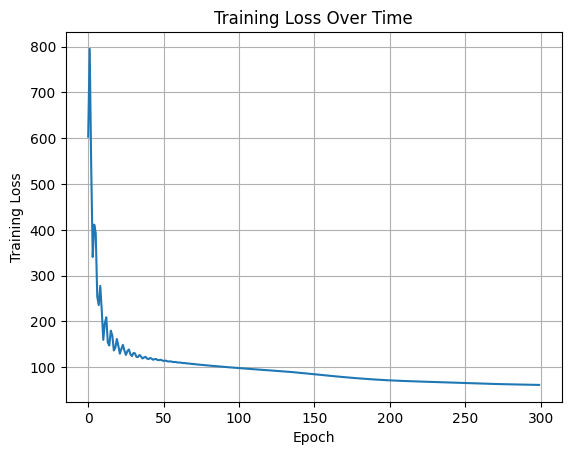

In [84]:
import matplotlib.pyplot as plt

# Plot training loss curve
plt.plot(range(num_epochs), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()


### ✍️ Practice Task 7.1: Students Customize the Plot

### 🛠️ Practice Exercise 7.1: Customize the Loss Plot

✅ Your Task:

- Change the line style (e.g., make it dashed `--`)
- Add markers (e.g., circles `o` every 20 points)
- Add a horizontal line showing the final loss value as reference.

✅ Write your code in the code cell below.

✅ Tip: Use `plt.axhline()` for horizontal reference lines.

---


### 🖥️ Example Solution (hidden for later)

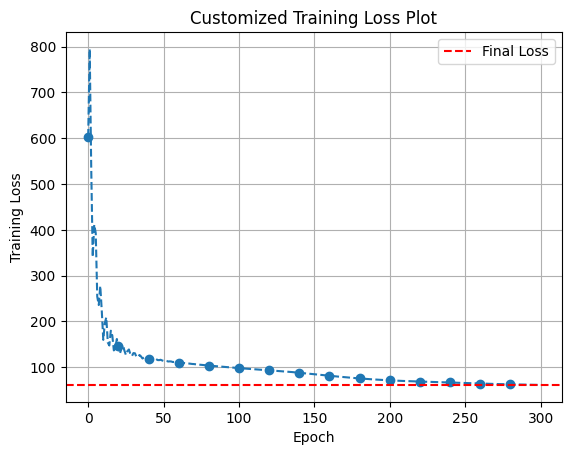

In [85]:
# Student example solution

plt.plot(range(num_epochs), train_losses, '--o', markevery=20)
plt.axhline(y=train_losses[-1], color='red', linestyle='dashed', label='Final Loss')

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Customized Training Loss Plot')
plt.legend()
plt.grid(True)
plt.show()


## 📚 Section 8: Evaluating the MLP

### 🧠 Markdown Cell 8.1: Why Evaluate on Test Set?

# 8.1 Evaluating the Model

✅ After training,  
we must **evaluate** the model on **unseen data (Test set)**.

---

🔵 **Why?**

- To measure **how well** the model generalizes to new data.
- A model that performs well on training but badly on test = **overfitting**.

---

🔵 **Steps to Evaluate:**

1. Forward pass on Test data
2. Calculate the Test Loss (e.g., MSE)

---

🔔 **Compare:**
- Training Loss vs. Test Loss

✅ Ideally:  
Test Loss should be **slightly higher** than Training Loss,  
but not **very high** (which indicates poor generalization).

---


### 🖥️ Code Cell 8.1: Evaluate on Training and Test Data

In [87]:
# Evaluate model performance

# Turn off gradient tracking (no need during evaluation)
with torch.no_grad():
    # Predict on train set
    train_preds = model(X_train)
    train_loss = loss_fn(train_preds, y_train)

    # Predict on test set
    test_preds = model(X_test)
    test_loss = loss_fn(test_preds, y_test)

print(f"Final Training Loss (MSE): {train_loss.item():.4f}")
print(f"Final Testing Loss (MSE): {test_loss.item():.4f}")


Final Training Loss (MSE): 61.3254
Final Testing Loss (MSE): 62.2095


### ✍️ Practice Task 8.1: Deeper Student Practice

# 🛠️ Practice Exercise 8.1: Deeper Evaluation

✅ **Your Task:**

- Calculate and print **Root Mean Squared Error (RMSE)** for both **training** and **testing** sets.

---

### ✅ Formula:

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

---

### ✅ Hints:

- Use `torch.sqrt()` to compute the square root  
- Use `.item()` to get the numerical value from a single-element tensor

---

✅ **Write your code below!**


### 🖥️ Example Solution (after practice)


In [ ]:
# Example Solution

train_rmse = torch.sqrt(train_loss)
test_rmse = torch.sqrt(test_loss)

print(f"Training RMSE: {train_rmse.item():.4f}")
print(f"Testing RMSE: {test_rmse.item():.4f}")

## 📚 Section 9: Reflection on Model Performance

### 🧠 Markdown Cell 9.1: Understanding Generalization

### 9.1 Reflection: Generalization, Overfitting, and Underfitting

✅ Now that you have trained and evaluated your MLP,  
let's reflect on the results!

---

🔵 **Generalization**

- **Good generalization** means the model works well on both training and unseen test data.
- The model should **not memorize** only the training set.

---

🔵 **Signs of Overfitting**

- Training loss is low ✅
- But test loss is **much higher** ❌
- The model "memorizes" training data but **fails to generalize**.

🔵 **Signs of Underfitting**

- Both training and test losses are **high** ❌
- The model is **too simple** to capture the underlying pattern.

---

✅ **Goal:**
- Training loss ↓
- Test loss ↓
- Test loss slightly higher than training loss (acceptable).

---


### ✍️ Practice Task 9.1: Quick Critical Thinking

### 🛠️ Practice Exercise 9.1: Analyze Your Model

✅ Your Task:

- Look at your Training Loss and Testing Loss.
- Answer the following questions:

1. Is there a big gap between training and test loss? (Yes/No)
2. Do you suspect overfitting, underfitting, or good generalization? (One-word answer)
3. Suggest one change you would try next time to improve the model performance.

✅ Write your answers in a Markdown cell below!

---


### ✍️ Practice Task 9.1: Quick Critical Thinking

# 🛠️ Practice Exercise 9.1: Analyze Your Model

✅ Your Task:

- Look at your Training Loss and Testing Loss.
- Answer the following questions:

1. Is there a big gap between training and test loss? (Yes/No)
2. Do you suspect overfitting, underfitting, or good generalization? (One-word answer)
3. Suggest one change you would try next time to improve the model performance.

✅ Write your answers in a Markdown cell below!

---


### 🎯 Bonus MCQ: Test Yourself

**Q1. If training loss is low but testing loss is very high, this suggests:**

- [ ] Underfitting
- [x] Overfitting
- [ ] Good generalization

**Q2. Increasing the number of hidden neurons usually:**

- [ ] Reduces overfitting
- [x] Increases model capacity
- [ ] Decreases model capacity

**Q3. Using a very high learning rate usually causes:**

- [ ] Faster convergence always
- [ ] Better generalization
- [x] Unstable or diverging training

✅ Answer these quickly to reinforce your understanding!

---
